In [3]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


## 1. GRID

In [6]:
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']

ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds=ds.mean(dim='SoilMoist_profiles')
ds_SM=ds['SoilMoist_tavg']/(60*60*24*30)  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
ds_SM=ds_SM.compute()

ds_SM.isel(lat=129,lon=100).diff(dim='time')
ds_SM.isel(lat=129,lon=100)-ds_SM.isel(lat=129,lon=100).shift(time=1)

#ds_SM.isel(lat=129,lon=100).compute()
#ds_SM.mean(dim='time').plot(vmin=0,vmax=0.4)

<xarray.DataArray 'SoilMoist_tavg' (time: 504)>
array([            nan, -1.83731192e-03,  6.54658565e-04, -3.18287037e-05,
       -1.32218364e-02,  4.79553675e-02,  7.21498843e-03,  1.25996335e-02,
       -8.84784915e-03, -4.41035880e-02, -9.76273148e-04, -1.11142458e-03,
        2.96554302e-03, -6.02717496e-03,  2.45165413e-03, -3.37779707e-03,
       -6.64646026e-03, -1.18118731e-02,  2.88360581e-02,  5.30550251e-02,
        2.32767892e-02, -3.45688899e-02, -2.86500530e-02, -2.62905093e-03,
       -3.31500772e-04, -5.09447338e-03, -2.35549286e-03, -3.21783372e-04,
       -1.01162953e-02, -1.24015963e-02,  3.04797213e-02,  1.46120274e-03,
       -1.10107784e-02, -2.03125000e-04,  4.43168885e-03, -9.06254823e-03,
       -2.36738040e-03, -8.77387153e-04, -1.65007716e-03, -2.51711998e-04,
       -8.62350502e-03, -1.67918355e-02,  3.94619261e-02,  9.67351948e-02,
       -8.80261381e-03, -3.56273389e-02, -3.93046152e-02, -2.93272569e-03,
       -3.91816165e-03, -2.70329379e-03, -4.28896605e-03, -1.28546971e-03,
       -1.21134983e-02, -3.31534529e-03,  3.41731047e-02,  2.12962963e-02,
       -2.66043355e-02,  1.93528405e-02, -1.62190394e-02, -5.63498264e-03,
        1.52736786e-03, -7.95768229e-03, -2.00940394e-03,  2.15897473e-03,
       -1.48152247e-02,  2.40467062e-02,  1.48670187e-02,  2.42687596e-02,
       -5.59393326e-02, -6.25892168e-04, -1.50427758e-02,  1.29583816e-03,
        6.37979842e-03,  5.35640914e-03, -1.12092978e-02,  9.70124421e-04,
       -8.40374228e-03, -2.53026138e-03,  2.15244020e-02,  6.65601852e-02,
...
       -1.53383970e-02,  9.87227527e-03, -2.16269049e-02,  1.56034915e-02,
       -9.12760417e-04, -2.72188947e-02, -1.55680941e-03, -2.25612461e-03,
       -2.14433835e-04,  2.92824074e-04,  3.39035976e-03, -2.69126157e-03,
       -2.37495177e-03,  1.90441262e-02,  4.99276379e-02,  7.73116802e-03,
        3.20880835e-02,  2.03337191e-03, -3.86212384e-02, -4.34293017e-03,
       -3.10059799e-03, -2.72106481e-03,  2.50892168e-04, -4.61178627e-03,
       -8.95293210e-03,  2.15904225e-02, -5.14064911e-03,  1.71424334e-02,
        2.49329668e-03, -1.42505787e-04, -1.99387297e-02, -3.93815104e-03,
       -2.59051890e-03, -1.08945795e-03, -9.25395448e-04, -1.06172840e-03,
       -6.91206115e-03,  2.14295669e-02,  2.15169030e-02,  7.39667728e-03,
       -9.93004919e-03, -3.53012635e-02, -7.80644772e-03,  2.31831115e-03,
       -3.56397087e-03,  2.10816937e-04, -2.21520544e-03, -5.27826003e-04,
       -9.52324460e-03,  3.31669560e-04,  5.45352527e-02,  5.44271074e-02,
        1.02671200e-02, -1.05322627e-02, -5.08483314e-02, -2.18375289e-02,
        4.17259838e-03, -1.20391831e-02, -1.98664159e-04, -3.21103395e-03,
       -1.01356819e-02,  2.43998601e-02,  1.67585841e-02,  3.83754340e-02,
        7.09350887e-03, -1.55130208e-02, -4.52265384e-02, -4.66244695e-03,
       -7.33072917e-04, -5.64843750e-03, -2.70165413e-03,  1.14776235e-04,
        3.61159336e-04,  4.07953077e-02,  4.32100212e-02, -1.90437404e-02,
        2.42929687e-02, -3.72867959e-02, -2.61829668e-02, -2.53122830e-02])
Coordinates:
  * time         (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2021-12-31
    spatial_ref  int64 0
    lat          float64 18.45
    lon          float64 78.05

In [10]:
ds

<xarray.Dataset>
Dimensions:           (time: 504, lat: 320, lon: 300)
Coordinates:
  * time              (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2021-12-31
    spatial_ref       int64 ...
  * lat               (lat) float64 5.55 5.65 5.75 5.85 ... 37.25 37.35 37.45
  * lon               (lon) float64 68.05 68.15 68.25 ... 97.75 97.85 97.95
Data variables: (12/20)
    Swnet_tavg        (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    Lwnet_tavg        (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    Qle_tavg          (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    Qh_tavg           (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    Qg_tavg           (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    Snowf_tavg        (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    ...                ...
    WaterTableD_tavg  (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    TWS_tavg          (time, lat, lon) float64 dask.array<chunksize=(168, 320, 300), meta=np.ndarray>
    GWS_tavg          (time, lat, lon) float64 dask.array<chunksize=(168, 320, 300), meta=np.ndarray>
    TotalPrecip_tavg  (time, lat, lon) float32 dask.array<chunksize=(252, 320, 300), meta=np.ndarray>
    RE                (time, lat, lon) float64 dask.array<chunksize=(168, 320, 300), meta=np.ndarray>
    RE_cleaned        (time, lat, lon) float64 dask.array<chunksize=(168, 320, 300), meta=np.ndarray>

## 1 Soil Moisture line graph

In [43]:
ds_RM.region

<xarray.DataArray 'region' (region: 18)> Size: 864B
array(['Indus', 'Ganga', 'WFKS', 'Sabarmati', 'Mahi', 'Tapi', 'Narmada',
       'Brahmaputra', 'Subarnarekha', 'Brahmani', 'Mahanadi', 'Godavari',
       'Krishna', 'Penanr', 'Cauvery', 'EFPK', 'EFMP', 'West Flowing'],
      dtype='<U12')
Coordinates:
    spatial_ref  int32 4B ...
  * region       (region) <U12 864B 'Indus' 'Ganga' ... 'EFMP' 'West Flowing'

C:\Users\sstar\AppData\Local\Temp\ipykernel_8712\221115514.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


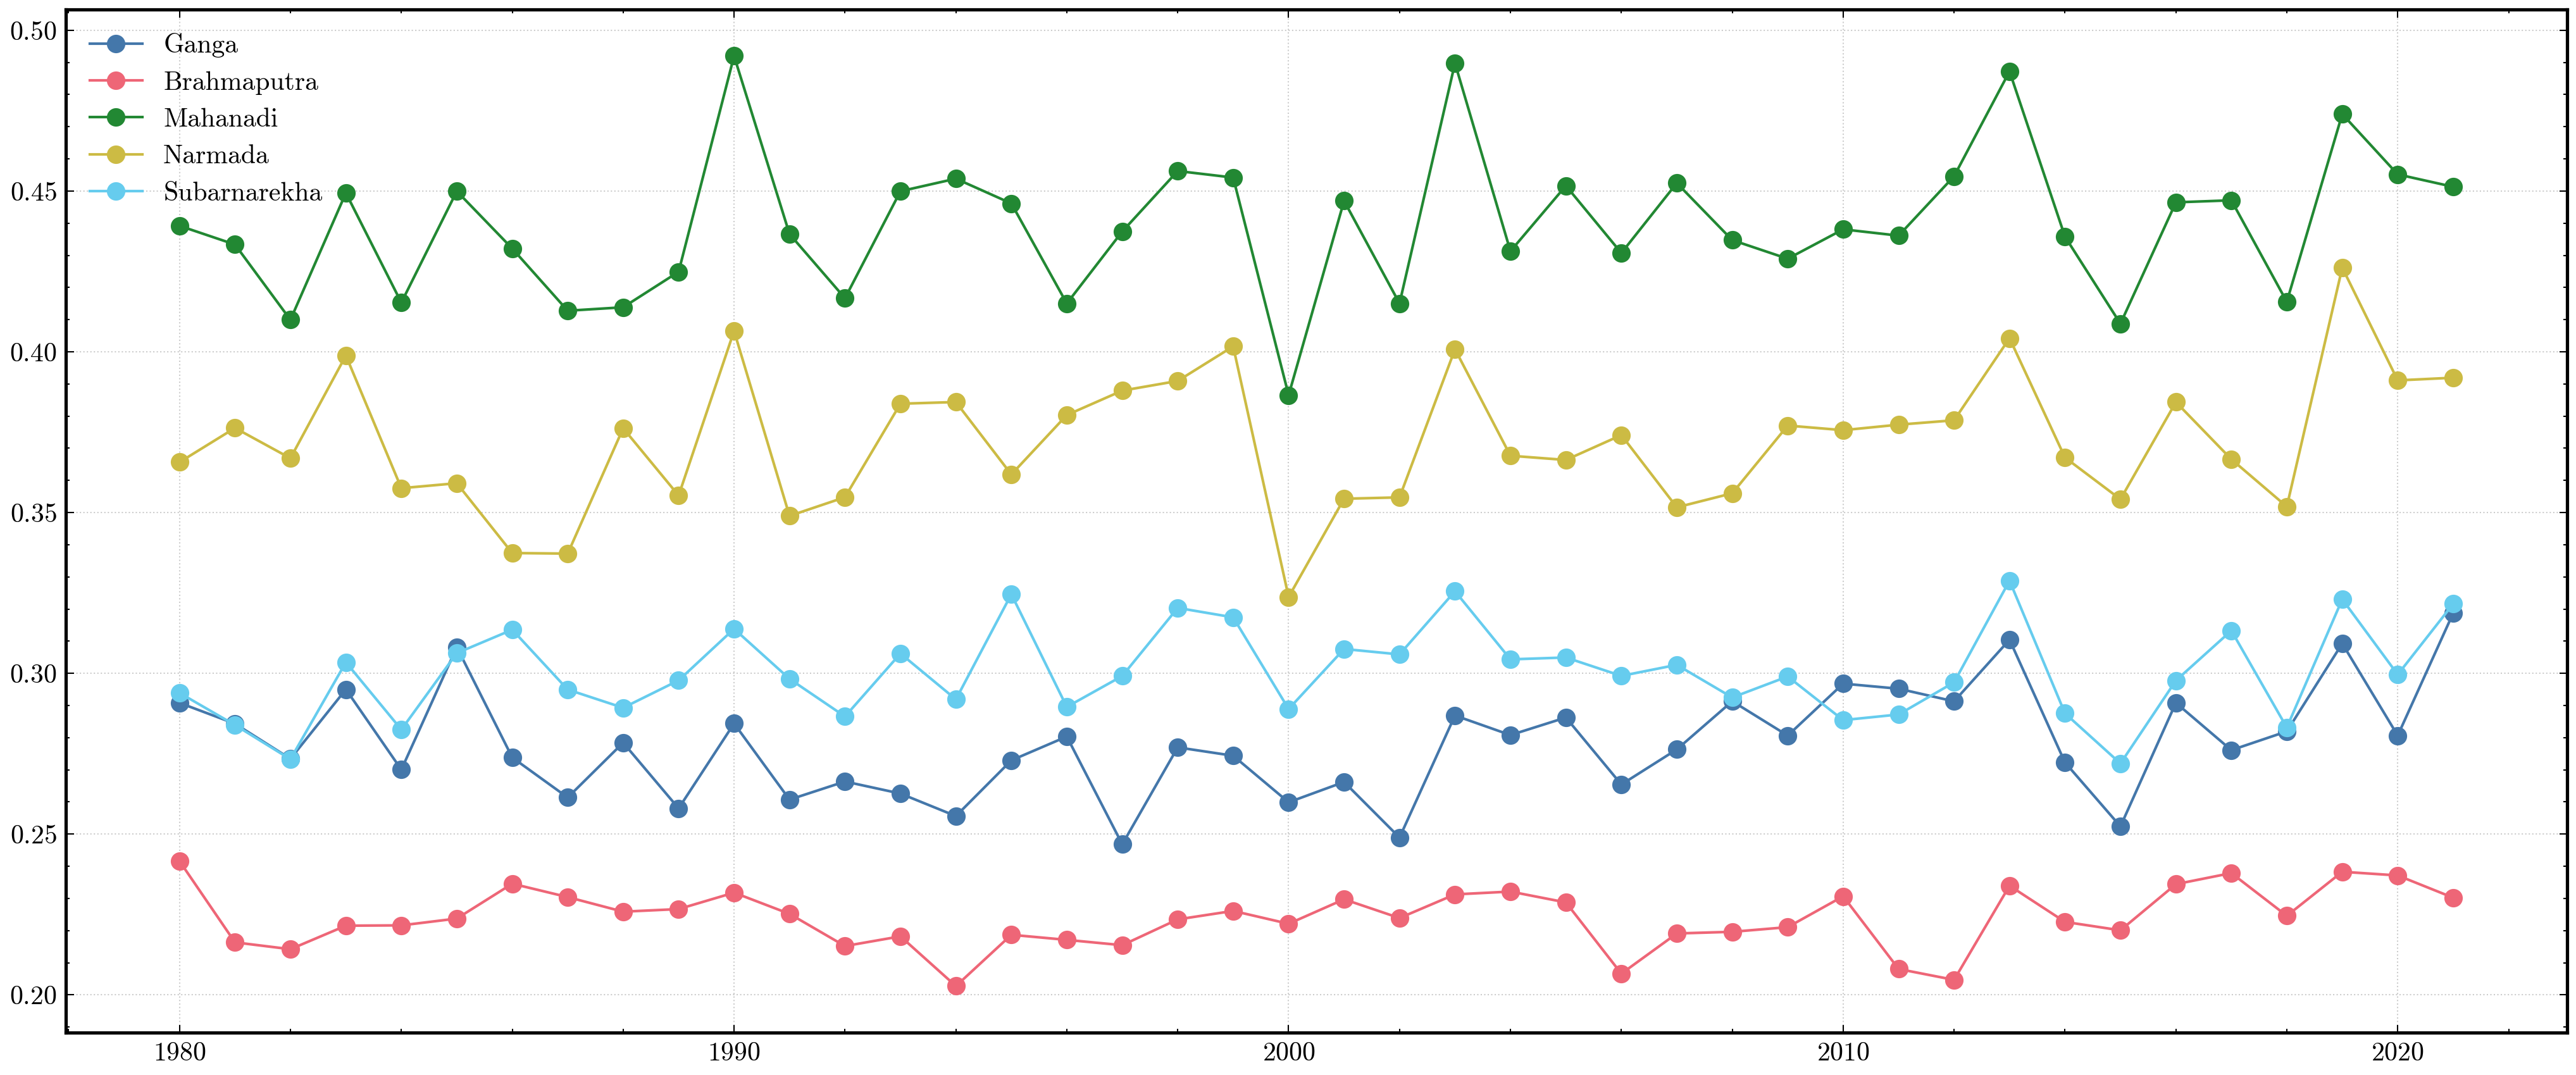

In [44]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
#ssn = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
ssn = ['Monsoon']

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds_RM=ds_RM.sel(region=['Ganga','Brahmaputra','Mahanadi','Narmada','Subarnarekha'],season='Post-monsoon')

basin=ds_RM.region.values

ds_RM_SM=ds_RM['SoilMoist_tavg']/(60*60*24*30)  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
#ds_RM_SM.where(ds_RM_SM.isel(region=ds_RM_SM['region'].isin([range(1,20)])),ds_RM_SM.sel(region='Indus')/1000)


df = pd.DataFrame(columns=basin,index=ds_RM.year)
df = df.apply(pd.to_numeric, errors='coerce')


for i, Reg in enumerate(basin):

    df.iloc[:,i] = ds_RM_SM.isel(region=i).compute().values

#df.loc[['Indus'],:]=df.loc[['Indus'],:]/1000



import scienceplots
plt.style.use(['science','no-latex','bright'])
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot( y=basin, marker='o', linestyle='-', ax=ax)


[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')



## 2. REGIONAL - Soil moisture sensitivty (SM/PPT)

In [102]:
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']

ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds=ds.mean(dim='SoilMoist_profiles')


dataset=[]
lsm_R1=ds
for i in range(len(gdf_p.Basin)):
    
    B=gdf_p[gdf_p['Basin'] == gdf_p['Basin'][i]]
    lsm_R1.rio.set_spatial_dims(y_dim="lat",x_dim="lon", inplace=True)
    lsm_R1.rio.write_crs("EPSG:4326", inplace=True)
    lsm_clip = lsm_R1.rio.clip(B.geometry.apply(mapping), B.crs, drop=True)
    A=lsm_clip.mean(dim=['lat','lon']).expand_dims(dim='region')
    dataset.append(A)
    
lsm_R_all = xr.concat(dataset, dim='region')
lsm_R_all['region'] = np.array(gdf_p.Basin)

ds_RM=lsm_R_all
basin=ds_RM.region.values

sm=ds_RM['SoilMoist_tavg'].compute()/(60*60*24*30)
re=ds_RM['RE_cleaned'].compute()
ppt=ds_RM['TotalPrecip_tavg'].compute()



In [109]:
df=pd.DataFrame(index=basin,columns=['AMC','PPT'])
for reg in basin:
    sm_reg=sm.sel(time=sm['time.month'].isin([5]),region=reg).values
    ppt_reg=ppt.sel(time=sm['time.month'].isin([5]),region=reg).values
    re_reg=re.sel(time=sm['time.month'].isin([5]),region=reg).values
    df['AMC'][reg]=np.corrcoef(sm_reg,ppt_reg)[0,1]
    df['PPT'][reg]=np.corrcoef(ppt_reg,re_reg)[0,1]
    

In [110]:
df

,AMC,PPT
Indus,0.595338,0.617622
Ganga,0.624137,0.618254
WFKS,0.325103,0.462825
Sabarmati,0.330012,0.818928
Mahi,0.281632,0.854817
Tapi,0.312062,0.822936
Narmada,0.185911,0.880561
Brahmaputra,0.607623,0.401594
Subarnarekha,0.772741,0.655185
Brahmani,0.853763,0.848433


C:\Users\sstar\AppData\Local\Temp\ipykernel_29744\2990444010.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


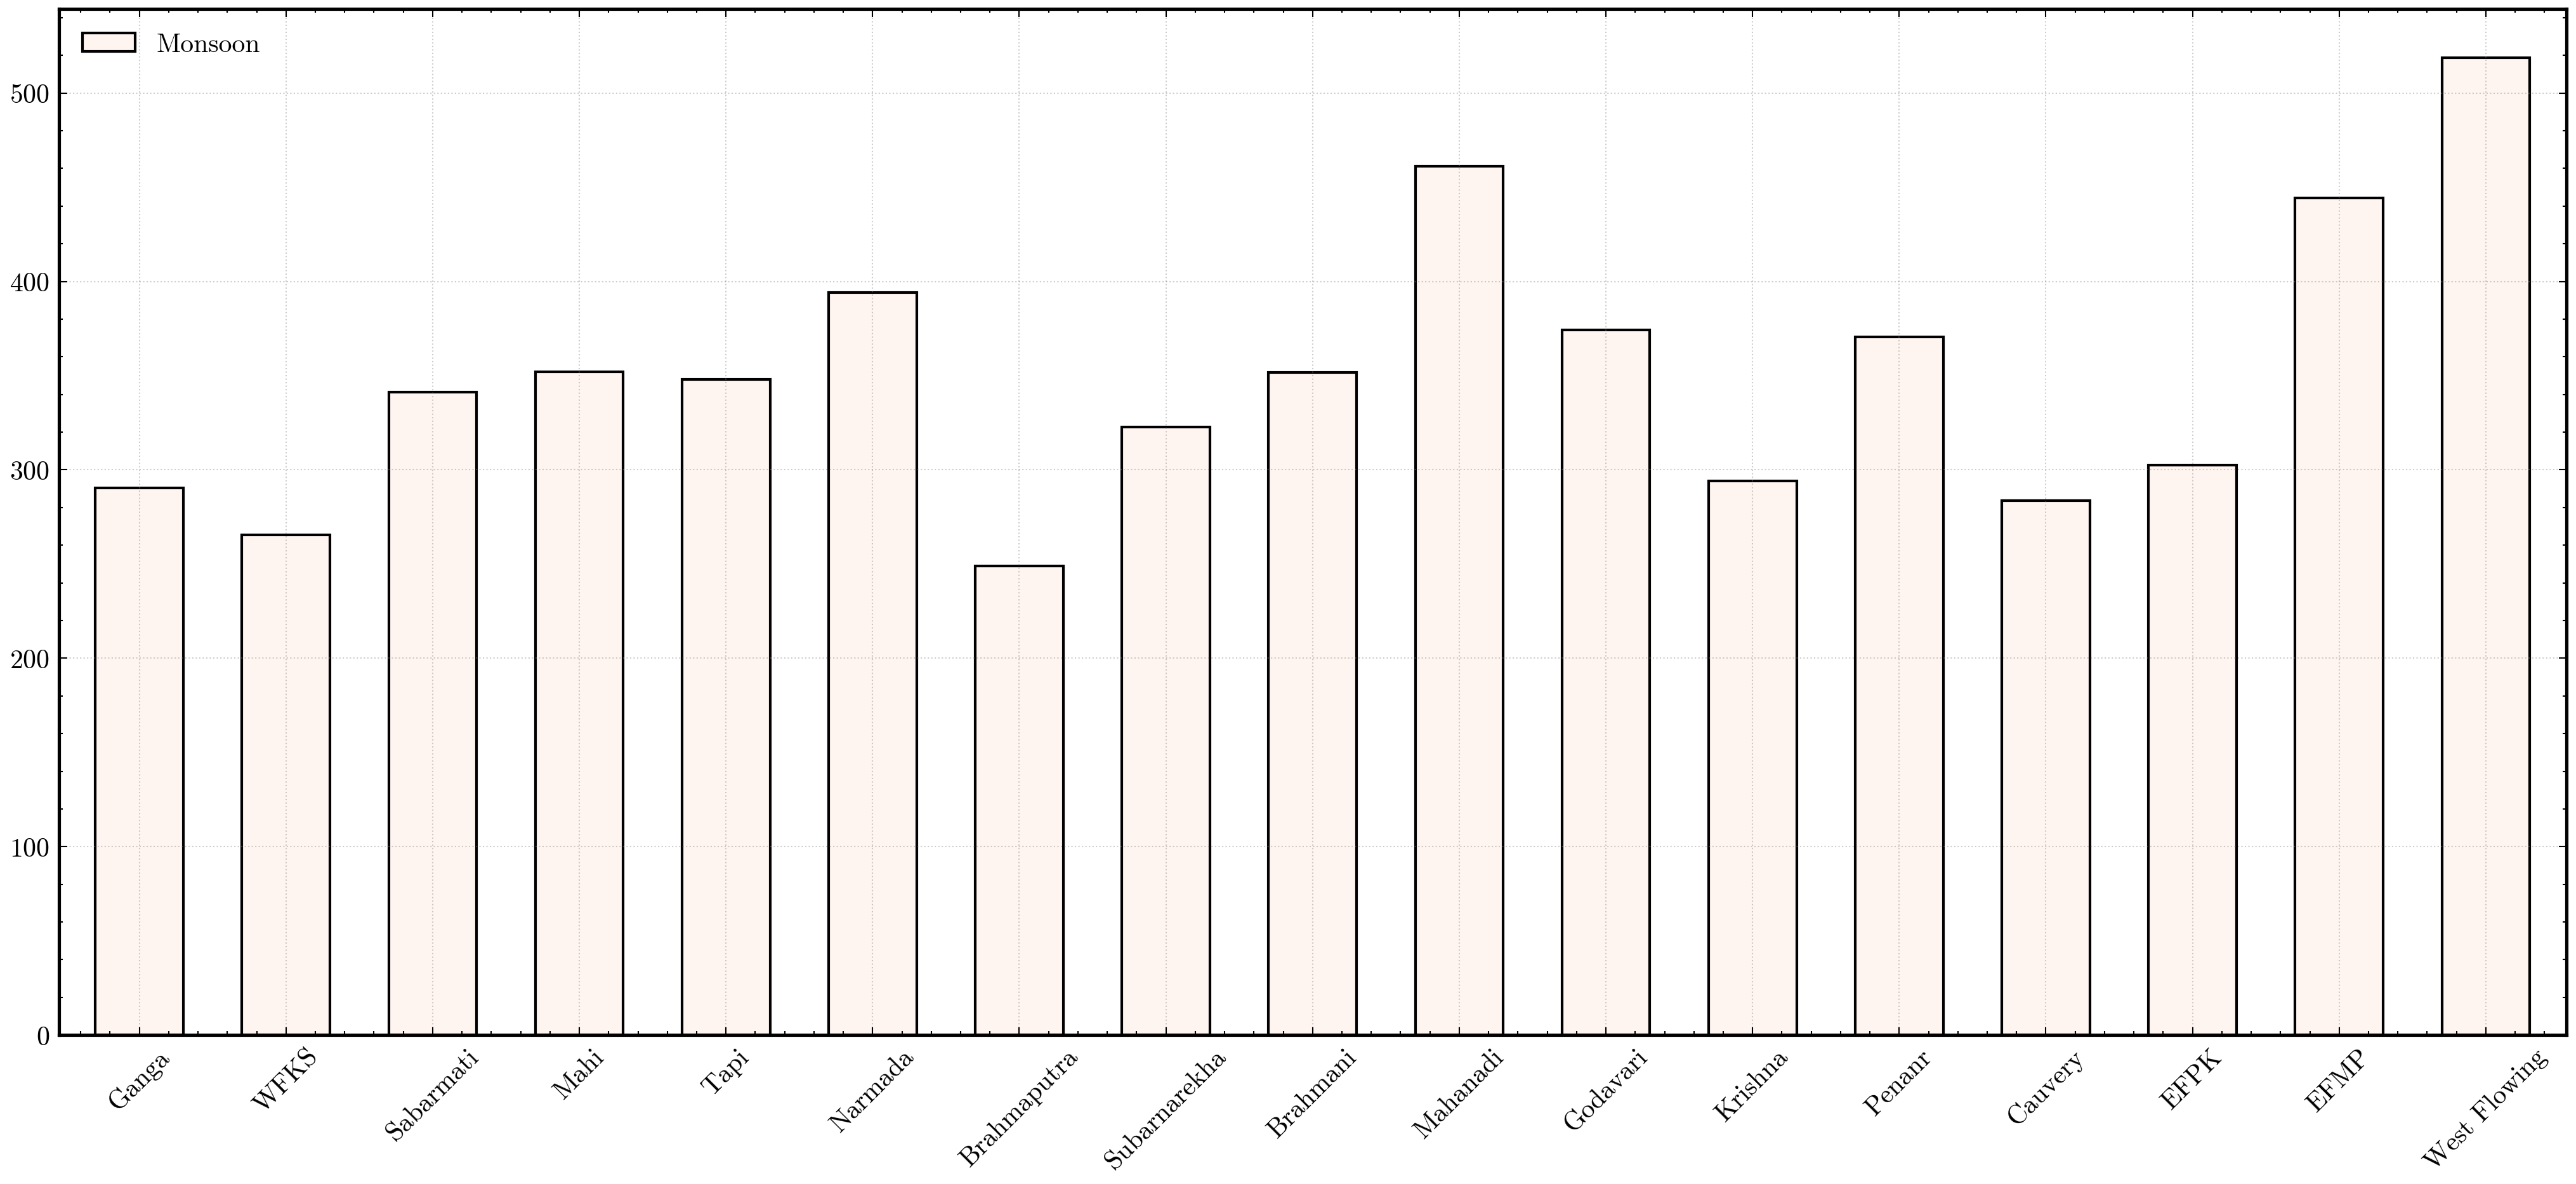

In [6]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
#ssn = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
ssn = ['Monsoon']

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds_RM = ds_RM.where(ds_RM['region'] != 'Indus', drop=True)

basin=ds_RM.region.values

ds_RM_SM=ds_RM['SoilMoist_tavg']/(60*60*24*30)  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
#ds_RM_SM.where(ds_RM_SM.isel(region=ds_RM_SM['region'].isin([range(1,20)])),ds_RM_SM.sel(region='Indus')/1000)


df = pd.DataFrame(columns=ssn,index=basin)
df = df.apply(pd.to_numeric, errors='coerce')


for i, Reg in enumerate(basin):


    SM=ds_RM_SM.isel(region=i, season=2)-ds_RM_SM.isel(region=i, season=0)
    #ppt=ds_RM['TotalPrecip_tavg'].isel(region=i, season=2)-ds_RM['TotalPrecip_tavg'].isel(region=i, season=1)
    ppt=ds_RM['TotalPrecip_tavg'].isel(region=i, season=0)
    #
    sens=SM/ppt
    
    df.iloc[i,0] = SM.mean(dim='year').compute().values*1000

#df.loc[['Indus'],:]=df.loc[['Indus'],:]/1000



import scienceplots
plt.style.use(['science','no-latex','bright'])
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')

